In [1]:
import datetime
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [14]:
stockcode ='HDFC'

ts1 = str(int(datetime.datetime(2022, 5,3).timestamp())) 
ts2 = str(int(datetime.datetime(2022, 6, 3).timestamp()))

url = 'https://query1.finance.yahoo.com/v7/finance/download/' + stockcode + '.NS?period1=' + ts1 + '&period2=' + ts2 \
       + '&interval=1d&events=history'

print(url)
print (ts1, ts2)


https://query1.finance.yahoo.com/v7/finance/download/HDFC.NS?period1=1651561200&period2=1654239600&interval=1d&events=history
1651561200 1654239600


In [15]:
try:
    stockdata = pd.read_csv(url)
except:
    print("Not able to fetch value for code : "+stockcode)
    print("Either stock code is not correct or could be connectivity issue..")

In [16]:
stockdata.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-05-04,2271.300049,2278.000000,2192.000000,2206.949951,2178.981445,4754704
1,2022-05-05,2230.350098,2251.899902,2207.000000,2215.399902,2187.324219,2661611
2,2022-05-06,2170.000000,2190.000000,2142.750000,2150.649902,2123.394775,3862931
3,2022-05-09,2115.000000,2181.000000,2113.600098,2168.300049,2140.821289,3969231
4,2022-05-10,2163.449951,2221.800049,2160.250000,2201.300049,2173.403076,4205193


In [17]:
df = stockdata.drop(['Adj Close', 'Volume'], axis = 1)

In [18]:
df.head()

,Date,Open,High,Low,Close
0,2022-05-04,2271.300049,2278.000000,2192.000000,2206.949951
1,2022-05-05,2230.350098,2251.899902,2207.000000,2215.399902
2,2022-05-06,2170.000000,2190.000000,2142.750000,2150.649902
3,2022-05-09,2115.000000,2181.000000,2113.600098,2168.300049
4,2022-05-10,2163.449951,2221.800049,2160.250000,2201.300049


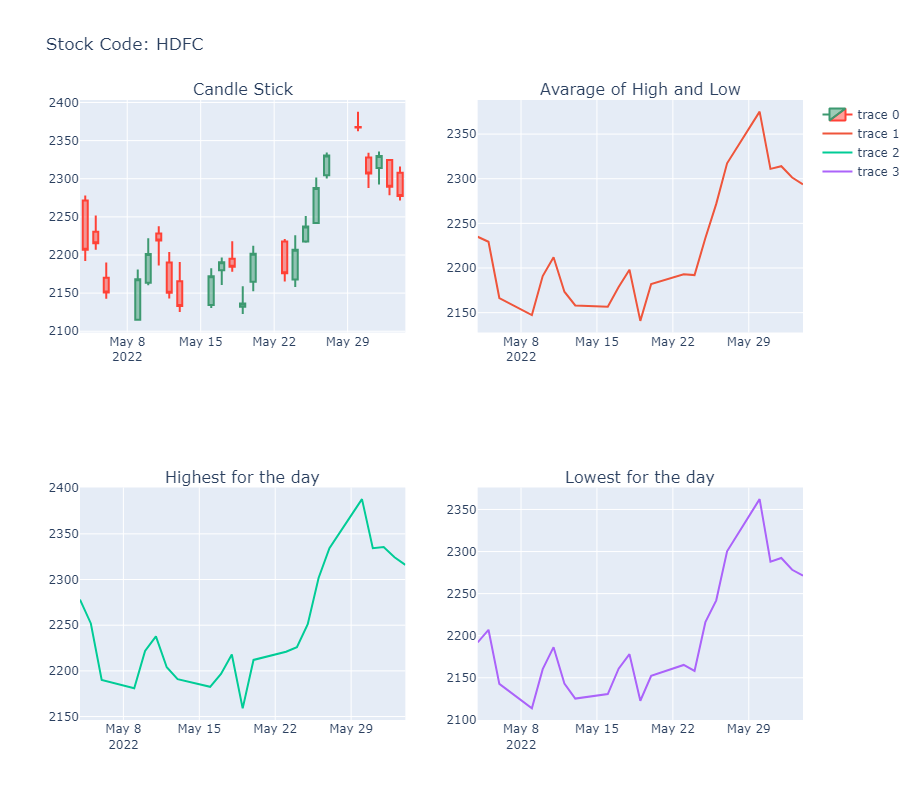

In [19]:

fig = make_subplots(rows=2, cols=2, subplot_titles=("Candle Stick", "Avarage of High and Low", "Highest for the day", "Lowest for the day"))

fig.add_trace(go.Candlestick(x=df['Date'],open=df['Open'], high=df['High'], low=df['Low'], close=df['Close']), 
              row=1, col=1 )

fig.add_trace(
    go.Scatter(x=df['Date'], y=(df['High']+df['Low'])/2),
    row=1, col=2)

fig.add_trace(
    go.Scatter(x=df['Date'], y=df['High']),
    row=2, col=1)

fig.add_trace(
    go.Scatter(x=df['Date'], y=df['Low']),
    row=2, col=2)

fig.update_layout(xaxis_rangeslider_visible=False, height=800, width=1000,
                  title_text='Stock Code: '+stockcode)

fig.show()